Perimeter: 391.36247873306274
Centroid: (112, 112)


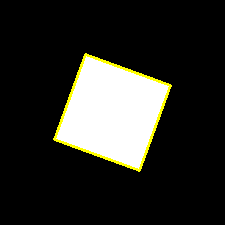

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow for Colab

# Load the image
image = cv2.imread('/content/drive/MyDrive/pics/im.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a threshold to create a binary image
_, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop through the contours to find rectangles or squares
for contour in contours:
    # Approximate the contour with a polygon
    epsilon = 0.04 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # If the polygon has 4 vertices, it's likely a rectangle or square
    if len(approx) == 4:
        # Calculate the parameters (perimeter and centroid)
        perimeter = cv2.arcLength(contour, True)
        M = cv2.moments(contour)
        if M["m00"] != 0:
            centroid_x = int(M["m10"] / M["m00"])
            centroid_y = int(M["m01"] / M["m00"])
        else:
            centroid_x, centroid_y = 0, 0

        # Display the parameters and centroid
        print(f"Perimeter: {perimeter}")
        print(f"Centroid: ({centroid_x}, {centroid_y})")

        # Draw the contour on the original image
        cv2.drawContours(image, [approx], 0, (0, 255, 255), 2)

# Display the image with contours using cv2_imshow
cv2_imshow(image)

